In [1]:


# data science
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [4]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [5]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement


Station = Base.classes.station

In [6]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [7]:
# Find the most recent date in the data set.
latest_date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1)
most_recent_date = latest_date_query.first()
most_recent_date

('2017-08-23',)

,date,precipitation
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


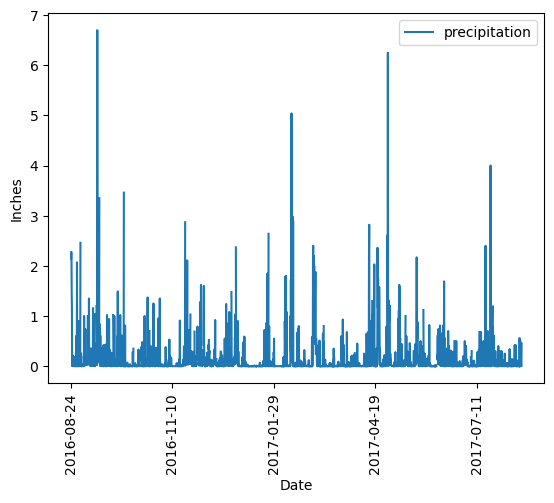

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017, 8, 23) - dt.timedelta(weeks=52)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
df.sort_values(by='date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

# Use Pandas Plotting with Matplotlib to plot the data
df.head()

In [9]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [10]:
# Design a query to calculate the total number of stations in the dataset
station_count_query = session.query(Station.station).count()

# Wrap the count in a list to match the original output format.
station_count = [(station_count_query,)]
station_count

[(9,)]

In [11]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station))

# Group the results by station
station_activity = station_activity.group_by(Measurement.station)

# Order the results in descending order based on the count
station_activity = station_activity.order_by(func.count(Measurement.station).desc())

# Fetch all results
station_activity_results = station_activity.all()

station_activity_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats_query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))

# Filter the results to only include the specified station
temperature_stats_query = temperature_stats_query.filter(Measurement.station == 'USC00519281')

# Execute the query and get all the results
temperature_stats = temperature_stats_query.all()

temperature_stats

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 23.52222222222222, 'Temperature')

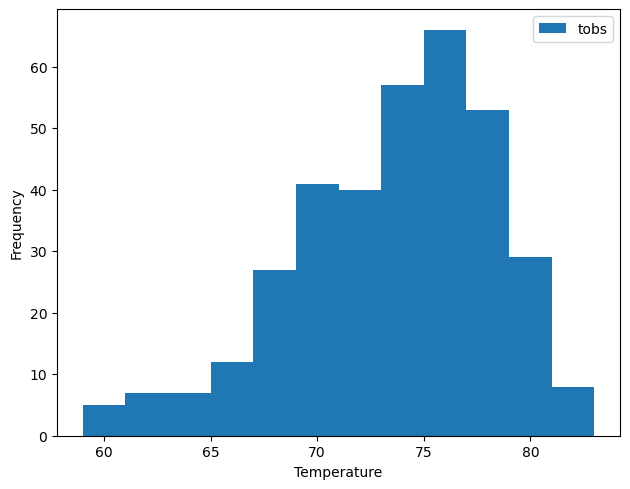

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
previous_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query to get temperature observations for a specific station after the calculated date
temperature_data = session.query(Measurement.tobs)
temperature_data = temperature_data.filter(Measurement.station == 'USC00519281')
temperature_data = temperature_data.filter(Measurement.date >= previous_year_date)

# Execute the query and store all results
temperature_data_results = temperature_data.all()

# Create a DataFrame from the results and name the column 'tobs'
temperature_df = pd.DataFrame(temperature_data_results, columns=['tobs'])

# Select a color for the histogram
hist_color = 'Teal'

# Plot a histogram of the temperature data with 12 bins
temperature_df.plot.hist(bins=12)

# Adjust layout for better fit
plt.tight_layout()

# Label the x-axis
plt.xlabel("Temperature")

# Close Session

In [18]:
# Close Session
session.close()
